Loading the Data

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#Data from Kaggle: https://www.kaggle.com/datasets/alamshihab075/heart-failure-diagnosis-data-for-machine-learning/data

#Predicting whether a person has heart failure or not using the binary variable cardio
#1 = Heart Failure, 0 = No Heart Failure
#Age of patient is in days
heart_df = pd.read_csv('/content/drive/MyDrive/HeartFailureDataset.csv')
heart_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0
7,12,22584,2,178,95,130,90,3,3,0,0,1,1
8,13,17668,1,158,71,110,70,1,1,0,0,1,0
9,14,19834,1,164,68,110,60,1,1,0,0,0,0


In [59]:
heart_df.shape

(70000, 13)

In [60]:
heart_df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,int64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


All columns being treated as intgers.

**1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]**

In [61]:
heart_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817714,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011381,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
heart_df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


Some of the features are on vastly different scales, so will likely need to standardize the data to ensure SVM isn't affected by features being on different scales. We'll have to drop the target variable id because it's not a useful feature for classification. Gender is categorical with 1 being female and 2 being male; will likely change this to 0 being female and 1 being male for simplicity. Choloresterol and Glucose are both ordered categorical data with values from 1-3. Will likely use one-hot encoding to address this. Our target variable cardio is binary classification and has a mean around .5, so we have about an equal number of people with and without heart disease in our dataset. We don't have unbalanced target classes to worry about in our dataset.

Text(0.5, 1.0, 'Histogram of Heart Disease')

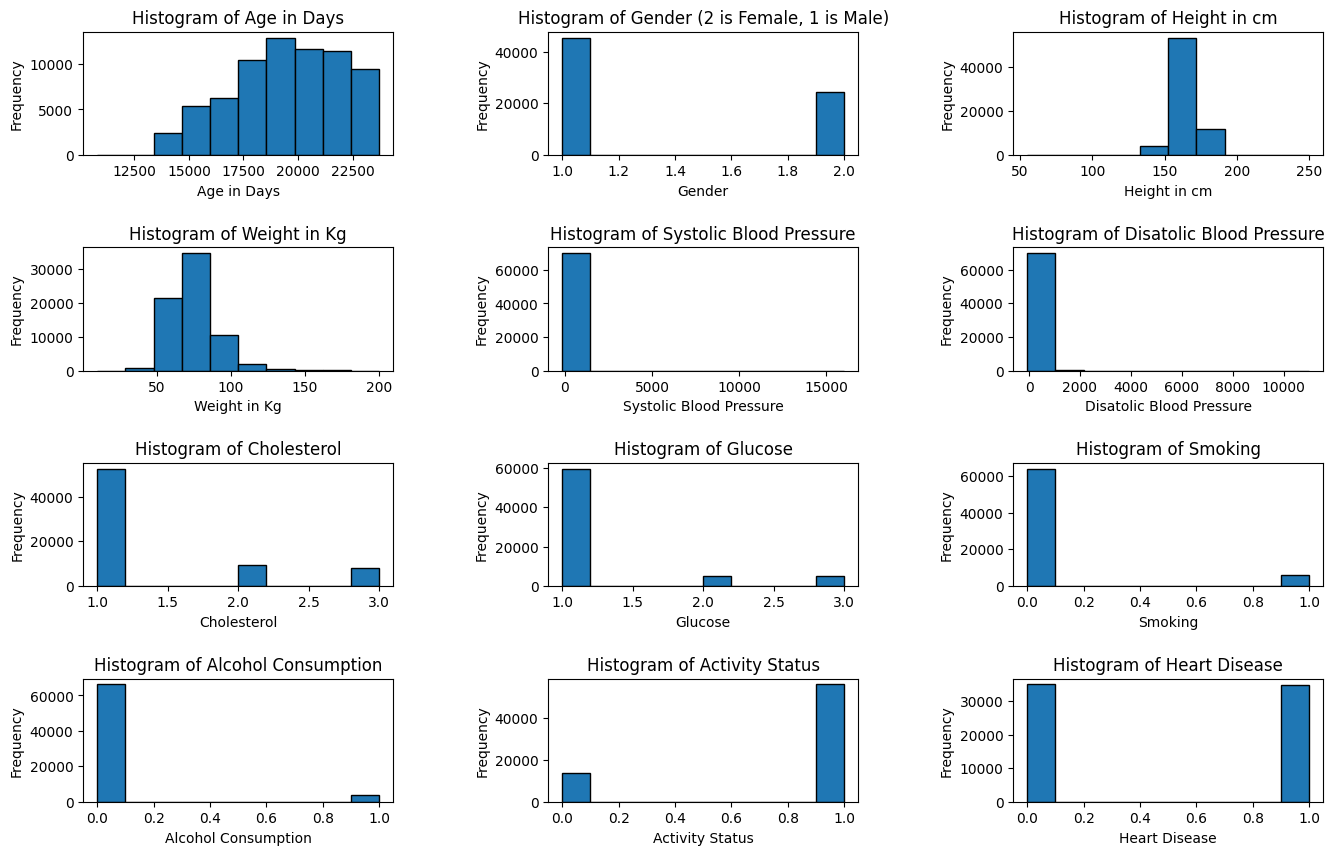

In [63]:
#Subplot grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(16, 10))

# Increase Horizontal and Vertical Space Between Plots two make plots look better
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.75)

#Age in days
axes[0, 0].hist(heart_df['age'], edgecolor = 'black')
axes[0, 0].set_xlabel('Age in Days')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Age in Days')

#Gender, 1 is currently female, 2 is male
axes[0, 1].hist(heart_df['gender'], edgecolor = 'black')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Gender (2 is Female, 1 is Male)')

#Height in cm.
axes[0, 2].hist(heart_df['height'], edgecolor = 'black')
axes[0, 2].set_xlabel('Height in cm')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Height in cm')

#Weight in Kg.
axes[1, 0].hist(heart_df['weight'], edgecolor = 'black')
axes[1, 0].set_xlabel('Weight in Kg')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Weight in Kg')

#Systolic Blood Pressure
axes[1, 1].hist(heart_df['ap_hi'], edgecolor = 'black')
axes[1, 1].set_xlabel('Systolic Blood Pressure')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Systolic Blood Pressure')

#Disatolic Blood Pressure
axes[1, 2].hist(heart_df['ap_lo'], edgecolor = 'black')
axes[1, 2].set_xlabel('Disatolic Blood Pressure')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of Disatolic Blood Pressure')

#Cholesterol (Categorical Variable 1 = Normal, 2 = Above Normal, 3 = Well Above Normal)
axes[2, 0].hist(heart_df['cholesterol'], edgecolor = 'black')
axes[2, 0].set_xlabel('Cholesterol')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of Cholesterol')

#Glucose (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)
axes[2, 1].hist(heart_df['gluc'], edgecolor = 'black')
axes[2, 1].set_xlabel('Glucose')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Histogram of Glucose')

#Smoking (Binary Variable 1 = Smoker, 0 = Non-Smoker)
axes[2, 2].hist(heart_df['smoke'], edgecolor = 'black')
axes[2, 2].set_xlabel('Smoking')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].set_title('Histogram of Smoking')


#Alcohol (Binary Variable 1 = Drinker, 0 = Non-Drinker)
axes[3, 0].hist(heart_df['alco'], edgecolor = 'black')
axes[3, 0].set_xlabel('Alcohol Consumption')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title('Histogram of Alcohol Consumption')

#Active (Binary Variable 1 = Active, 0 = Not Active)
axes[3, 1].hist(heart_df['active'], edgecolor = 'black')
axes[3, 1].set_xlabel('Activity Status')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].set_title('Histogram of Activity Status')

#Cardiovascular Disease (1 = Has heart disease, 0 = Doesn't have heart disease)
axes[3, 2].hist(heart_df['cardio'], edgecolor = 'black')
axes[3, 2].set_xlabel('Heart Disease')
axes[3, 2].set_ylabel('Frequency')
axes[3, 2].set_title('Histogram of Heart Disease')


We have some pretty extreme outliers for height and weight, so I'll take the log of them. There might be some error readings for Systolic and Disatolic blood pressure. They should have limits of around 250 to 150 respectively, will likely impute these values with the median.

The rest of the distributions look fairly normal or are binary.

In [64]:
#Replace Systolic Blood Pressure over 250 with the median
#Done with the help of Gemini
median_ap_hi = heart_df['ap_hi'].median()
heart_df['ap_hi'] = heart_df['ap_hi'].apply(lambda x: median_ap_hi if x > 250 else x)

In [65]:
#Replace Disatolic Blood Pressure over 150 with the median
median_ap_lo = heart_df['ap_lo'].median()
heart_df['ap_lo'] = heart_df['ap_lo'].apply(lambda x: median_ap_lo if x > 150 else x)

In [66]:
#Set gender from 1 to 2 to 0 to 1 - It's easier to interpret if it's on a binary scale
#0 is now Female, 1 is now Male
heart_df['gender'] = heart_df['gender'].apply(lambda x: 0 if x == 1 else 1)

In [67]:
#Log both height and weight to address extreme outliers
heart_df['log_height'] = np.log(heart_df['height'])

heart_df['log_weight'] = np.log(heart_df['weight'])

In [68]:
#One hot encoding done with help of chatgpt

# Perform one-hot encoding for 'cholesterol' column
cholesterol_dummies = pd.get_dummies(heart_df['cholesterol'], prefix='cholesterol', drop_first = True, dtype=int)
heart_df = pd.concat([heart_df, cholesterol_dummies], axis=1)

#Rename columns
#Cholesterol Normal will have 0 in both
heart_df.rename(columns={'cholesterol_2': 'Cholesterol Above Normal',
                         'cholesterol_3': 'Cholesterol Well Above Normal'}, inplace = True)

In [69]:
# Perform one-hot encoding for 'glucose' column
glucose_dummies = pd.get_dummies(heart_df['gluc'], prefix='glucose', drop_first = True, dtype=int)
heart_df = pd.concat([heart_df, glucose_dummies], axis=1)

#Rename columns
# Glucose Normal will have 0 in both
heart_df.rename(columns={'glucose_2': 'Glucose Above Normal',
                         'glucose_3': 'Glucose Well Above Normal'}, inplace = True)

In [70]:
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,log_height,log_weight,Cholesterol Above Normal,Cholesterol Well Above Normal,Glucose Above Normal,Glucose Well Above Normal
0,0,18393,1,168,62,110.0,80.0,1,1,0,0,1,0,5.123964,4.127134,0,0,0,0
1,1,20228,0,156,85,140.0,90.0,3,1,0,0,1,1,5.049856,4.442651,0,1,0,0
2,2,18857,0,165,64,130.0,70.0,3,1,0,0,0,1,5.105945,4.158883,0,1,0,0
3,3,17623,1,169,82,150.0,100.0,1,1,0,0,1,1,5.129899,4.406719,0,0,0,0
4,4,17474,0,156,56,100.0,60.0,1,1,0,0,0,0,5.049856,4.025352,0,0,0,0


Cleaned Data Before Normalization

Text(0.5, 1.0, 'Histogram of Heart Disease')

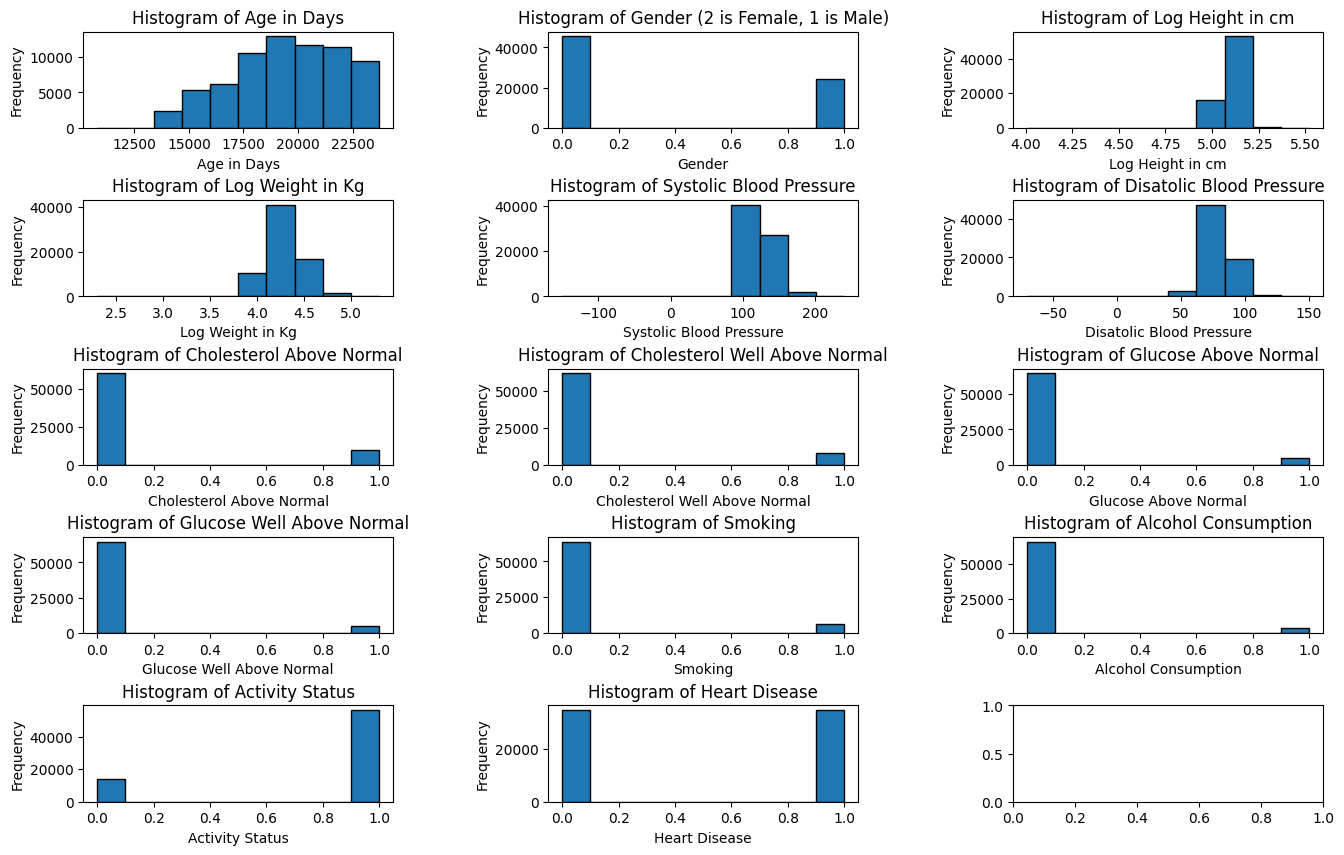

In [71]:
#Subplot grid with 4 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(16, 10))

# Increase Horizontal and Vertical Space Between Plots two make plots look better
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.75)

#Age in days
axes[0, 0].hist(heart_df['age'], edgecolor = 'black')
axes[0, 0].set_xlabel('Age in Days')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Age in Days')

#Gender (binary variable 0 is female 1 is male)
axes[0, 1].hist(heart_df['gender'], edgecolor = 'black')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Gender (2 is Female, 1 is Male)')

#Log Height in cm.
axes[0, 2].hist(heart_df['log_height'], edgecolor = 'black')
axes[0, 2].set_xlabel('Log Height in cm')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Log Height in cm')

#Log Weight in Kg.
axes[1, 0].hist(heart_df['log_weight'], edgecolor = 'black')
axes[1, 0].set_xlabel('Log Weight in Kg')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Log Weight in Kg')

#Systolic Blood Pressure
axes[1, 1].hist(heart_df['ap_hi'], edgecolor = 'black')
axes[1, 1].set_xlabel('Systolic Blood Pressure')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Systolic Blood Pressure')

#Disatolic Blood Pressure
axes[1, 2].hist(heart_df['ap_lo'], edgecolor = 'black')
axes[1, 2].set_xlabel('Disatolic Blood Pressure')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of Disatolic Blood Pressure')

#Cholesterol Above Normal (Binary Variable)
axes[2, 0].hist(heart_df['Cholesterol Above Normal'], edgecolor = 'black')
axes[2, 0].set_xlabel('Cholesterol Above Normal')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of Cholesterol Above Normal')

#Cholesterol Well Above Normal (Binary Variable)
axes[2, 1].hist(heart_df['Cholesterol Well Above Normal'], edgecolor = 'black')
axes[2, 1].set_xlabel('Cholesterol Well Above Normal')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Histogram of Cholesterol Well Above Normal')

#Glucose Above Normal (Binary Variable)
axes[2, 2].hist(heart_df['Glucose Above Normal'], edgecolor = 'black')
axes[2, 2].set_xlabel('Glucose Above Normal')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].set_title('Histogram of Glucose Above Normal')

#Glucose Well Above Normal (Binary Variable)
axes[3, 0].hist(heart_df['Glucose Well Above Normal'], edgecolor = 'black')
axes[3, 0].set_xlabel('Glucose Well Above Normal')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title('Histogram of Glucose Well Above Normal')

#Smoking (Binary Variable 1 = Smoker, 0 = Non-Smoker)
axes[3, 1].hist(heart_df['smoke'], edgecolor = 'black')
axes[3, 1].set_xlabel('Smoking')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].set_title('Histogram of Smoking')

#Alcohol (Binary Variable 1 = Drinker, 0 = Non-Drinker)
axes[3, 2].hist(heart_df['alco'], edgecolor = 'black')
axes[3, 2].set_xlabel('Alcohol Consumption')
axes[3, 2].set_ylabel('Frequency')
axes[3, 2].set_title('Histogram of Alcohol Consumption')

#Active (Binary Variable 1 = Active, 0 = Not Active)
axes[4, 0].hist(heart_df['active'], edgecolor = 'black')
axes[4, 0].set_xlabel('Activity Status')
axes[4, 0].set_ylabel('Frequency')
axes[4, 0].set_title('Histogram of Activity Status')

#Cardiovascular Disease (1 = Has heart disease, 0 = Doesn't have heart disease)
axes[4, 1].hist(heart_df['cardio'], edgecolor = 'black')
axes[4, 1].set_xlabel('Heart Disease')
axes[4, 1].set_ylabel('Frequency')
axes[4, 1].set_title('Histogram of Heart Disease')


In [72]:
heart_df_clean = heart_df[['age', 'gender', 'log_height', 'log_weight', 'ap_hi', 'ap_lo',
                            'Cholesterol Above Normal', 'Cholesterol Well Above Normal',
                            'Glucose Above Normal', 'Glucose Well Above Normal',
                            'smoke', 'alco', 'active', 'cardio']]

**2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]** **bold text**

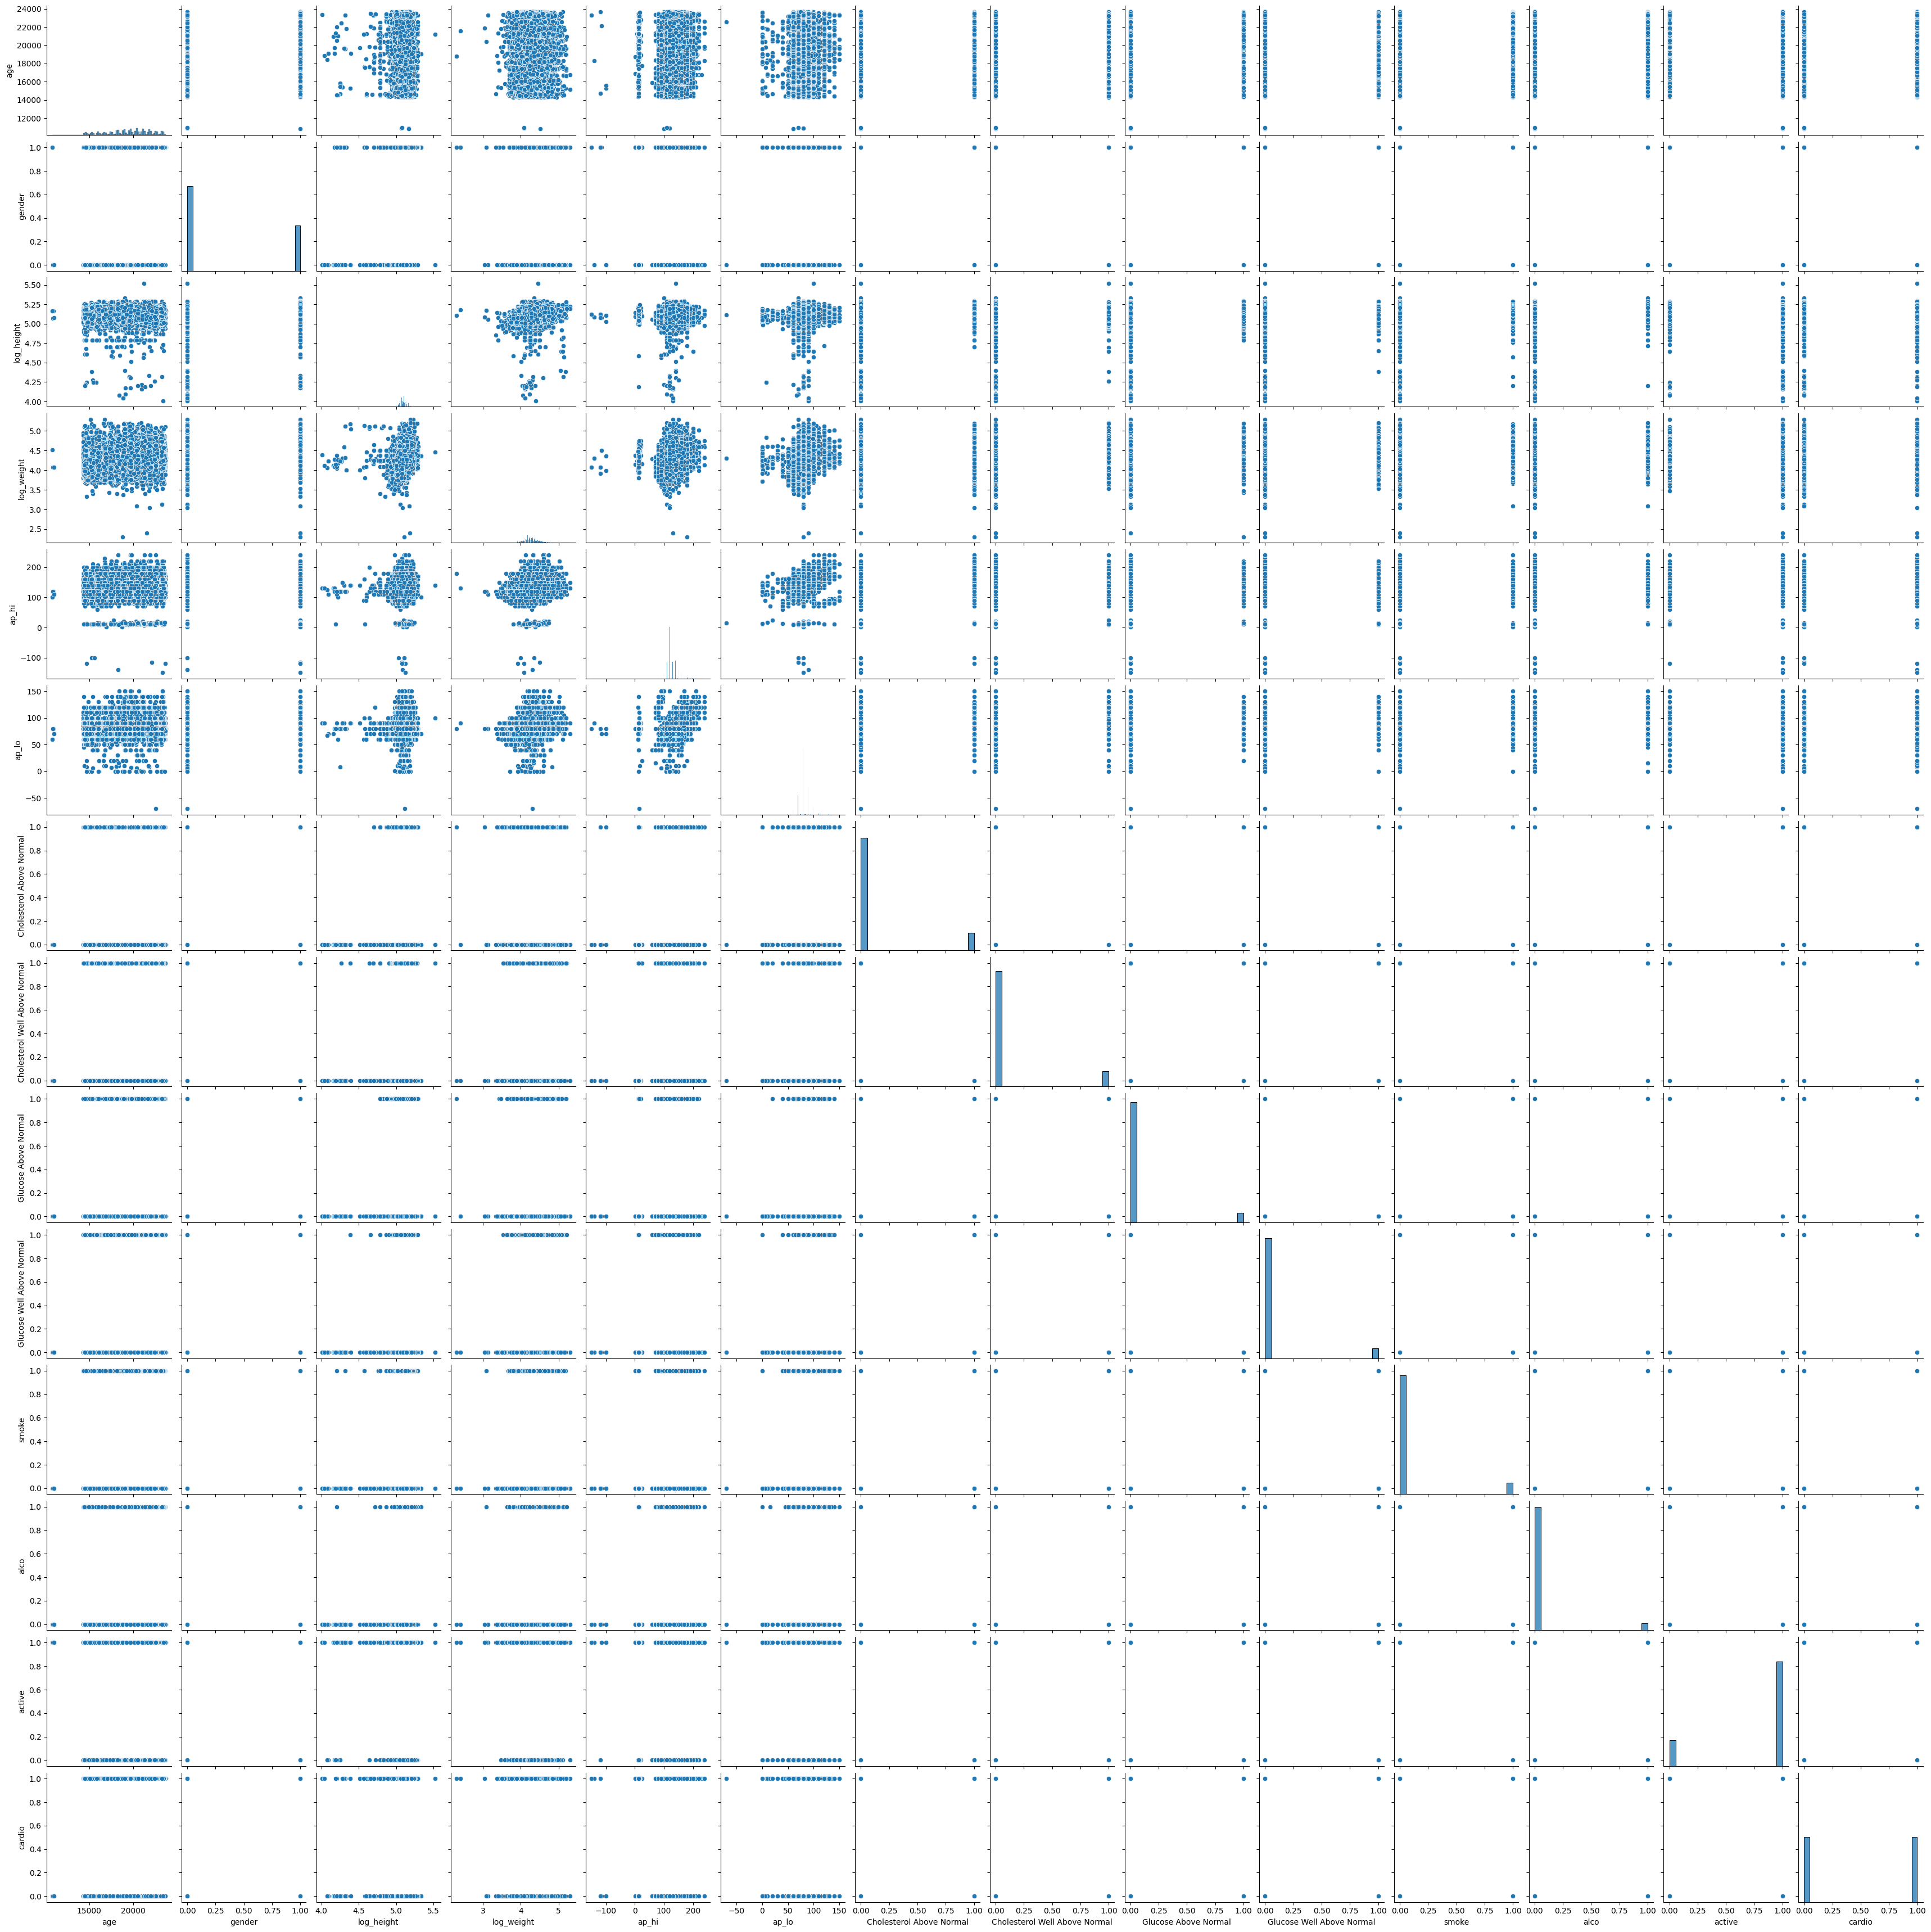

In [73]:
sns.pairplot(heart_df_clean)

In [74]:
heart_df_clean.corr()

,age,gender,log_height,log_weight,ap_hi,ap_lo,Cholesterol Above Normal,Cholesterol Well Above Normal,Glucose Above Normal,Glucose Well Above Normal,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.078601,0.059085,0.194051,0.150204,0.021910,0.152720,0.024742,0.094254,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.477803,0.165078,0.057814,0.065522,-0.016764,-0.029147,-0.004605,-0.019830,0.338135,0.170966,0.005866,0.008109
log_height,-0.078601,0.477803,1.000000,0.298689,0.015219,0.034878,-0.022213,-0.039672,-0.011794,-0.013001,0.179839,0.090138,-0.005483,-0.010624
log_weight,0.059085,0.165078,0.298689,1.000000,0.256933,0.247452,0.064819,0.112306,0.091073,0.066690,0.068629,0.067275,-0.017507,0.184251
ap_hi,0.194051,0.057814,0.015219,0.256933,1.000000,0.628546,0.093844,0.147666,0.073255,0.058721,0.028744,0.031728,0.002565,0.401766
ap_lo,0.150204,0.065522,0.034878,0.247452,0.628546,1.000000,0.070881,0.125843,0.059433,0.050009,0.025670,0.040269,-0.001678,0.326150
Cholesterol Above Normal,0.021910,-0.016764,-0.022213,0.064819,0.093844,0.070881,1.000000,-0.143431,0.274987,-0.054328,0.024587,0.039402,-0.004695,0.081442
Cholesterol Well Above Normal,0.152720,-0.029147,-0.039672,0.112306,0.147666,0.125843,-0.143431,1.000000,-0.014009,0.482027,-0.002185,0.016915,0.013081,0.191798
Glucose Above Normal,0.024742,-0.004605,-0.011794,0.091073,0.073255,0.059433,0.274987,-0.014009,1.000000,-0.081249,0.016082,0.031648,-0.009932,0.052841
Glucose Well Above Normal,0.094254,-0.019830,-0.013001,0.066690,0.058721,0.050009,-0.054328,0.482027,-0.081249,1.000000,-0.013074,-0.003499,-0.002397,0.070241


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'gender'),
  Text(2.5, 0, 'log_height'),
  Text(3.5, 0, 'log_weight'),
  Text(4.5, 0, 'ap_hi'),
  Text(5.5, 0, 'ap_lo'),
  Text(6.5, 0, 'Cholesterol Above Normal'),
  Text(7.5, 0, 'Cholesterol Well Above Normal'),
  Text(8.5, 0, 'Glucose Above Normal'),
  Text(9.5, 0, 'Glucose Well Above Normal'),
  Text(10.5, 0, 'smoke'),
  Text(11.5, 0, 'alco'),
  Text(12.5, 0, 'active'),
  Text(13.5, 0, 'cardio')])

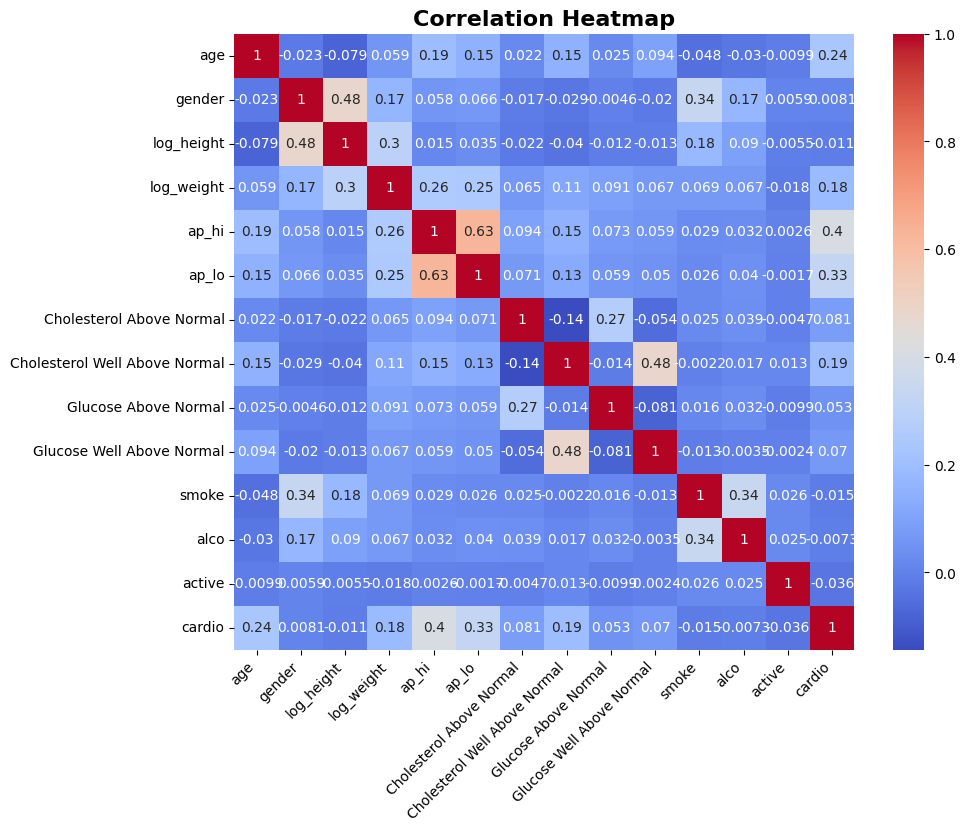

In [75]:
#Heatmap created with help of ChatGPT

corr_matrix = heart_df_clean.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap', fontsize = 16, fontweight ='bold')
plt.xticks(rotation=45, ha='right')

It's a little difficult to compare all the relationships at first, since there are so many variables but it's easier to see with the heatmap.

Most of the predictors aren't very strongly correlated. The 3 with the highest absolute value being: Systolic and Disatolic blood pressure at .63, glucose well above normal and cholesterol well above normal at .48, and smoking and gender at .34.

We shouldn't have many confounding variables in our features and each should be adding mostly new information to our models.

There aren't any super strong correlations between our predictors and our target variable cardio. The 3 strongest being Systolic blood pressure at .4, Disatolic blood pressure at .33, and age at .24.

**3. Create training, validation, and testing sets.**

In [76]:
features = ['age', 'gender', 'log_height', 'log_weight', 'ap_hi', 'ap_lo', 'Cholesterol Above Normal', \
            'Cholesterol Well Above Normal', 'Glucose Above Normal', 'Glucose Well Above Normal', \
            'smoke', 'alco', 'active']

target = 'cardio'

x = heart_df_clean[features]
y = heart_df_clean[target]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

#70% training, 15% validation, 15% testing split
training_x, temp_x, training_y, temp_y = train_test_split(x, y, test_size = .3, random_state = 42)

validation_x, testing_x, validation_y, testing_y = train_test_split(temp_x, temp_y, test_size = 0.5, random_state = 42)

Standardizing non-binary data

In [78]:
#Standardization done with the help of Gemini

# Identify binary and non-binary features
binary_features = ['gender', 'Cholesterol Above Normal', 'Cholesterol Well Above Normal',
                   'Glucose Above Normal', 'Glucose Well Above Normal', 'smoke', 'alco', 'active']
non_binary_features = [col for col in features if col not in binary_features]

# Concatenate training and validation data for fitting the scaler
training_validation_x_non_binary = pd.concat([training_x[non_binary_features], validation_x[non_binary_features]])

# standard scaling (mean 0, SD = 1 for each feature based on training and validation data)
scaler = StandardScaler()

# Fit on training and validation data and transform training, validation, and testing non-binary features
scaler.fit(training_validation_x_non_binary)
training_x_non_binary_scaled = scaler.transform(training_x[non_binary_features])
validation_x_non_binary_scaled = scaler.transform(validation_x[non_binary_features])
testing_x_non_binary_scaled = scaler.transform(testing_x[non_binary_features])

# Convert scaled non-binary features back to pandas DataFrames
training_x_non_binary_scaled = pd.DataFrame(training_x_non_binary_scaled, columns=non_binary_features, index=training_x[non_binary_features].index)
validation_x_non_binary_scaled = pd.DataFrame(validation_x_non_binary_scaled, columns=non_binary_features, index=validation_x[non_binary_features].index)
testing_x_non_binary_scaled = pd.DataFrame(testing_x_non_binary_scaled, columns=non_binary_features, index=testing_x[non_binary_features].index)


# Concatenate the scaled non-binary features and the original binary features
training_x_scaled = pd.concat([training_x[binary_features], training_x_non_binary_scaled], axis=1)
validation_x_scaled = pd.concat([validation_x[binary_features], validation_x_non_binary_scaled], axis=1)
testing_x_scaled = pd.concat([testing_x[binary_features], testing_x_non_binary_scaled], axis=1)

# Ensure the order of columns is the same as the original features
training_x_scaled = training_x_scaled[features]
validation_x_scaled = validation_x_scaled[features]
testing_x_scaled = testing_x_scaled[features]

In [79]:
training_x_scaled.head()

,age,gender,log_height,log_weight,ap_hi,ap_lo,Cholesterol Above Normal,Cholesterol Well Above Normal,Glucose Above Normal,Glucose Well Above Normal,smoke,alco,active
68681,0.384517,0,-0.491054,-0.697593,-0.365379,0.899666,0,1,0,0,0,0,1
19961,1.305989,1,0.333327,-0.614607,-0.365379,-0.130917,0,1,0,1,0,0,0
11040,1.344096,0,-0.491054,-0.532888,-0.365379,0.899666,0,0,0,0,0,0,1
27673,1.288962,0,-0.133417,-1.508766,-0.090639,0.899666,0,1,0,0,0,0,1
22876,0.909509,0,-0.733224,0.821279,1.283061,-0.130917,0,1,0,0,0,0,1


**4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**

**A. Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import random
from sklearn.svm import SVC # Import SVC

def classify_data(model):
  '''Enter model and print accuracy, precision, recall, and f1 score rounded to 4 digits'''
  #Get rid of multi_class depreciated warning
  warnings.filterwarnings('ignore')
  #Set random seed
  random.seed(42)

  # Fit the training data
  model.fit(training_x_scaled, training_y)

  # Predict for the validation data
  # Check if the model has predict_proba for soft voting
  if hasattr(model, 'predict_proba'):
      validation_pred = model.predict(validation_x_scaled)
  else:
      validation_pred = model.predict(validation_x_scaled)

  # Calculate metrics
  accuracy = accuracy_score(validation_y, validation_pred)
  #Have to take weighted average for every non-accuracy metric
  precision = precision_score(validation_y, validation_pred, average='weighted')
  recall = recall_score(validation_y, validation_pred, average='weighted')
  f1 = f1_score(validation_y, validation_pred, average='weighted')

  print(f'Validation Accuracy: {accuracy:.4f}')
  print(f'Validation Precision: {precision:.4f}')
  print(f'Validation Recall: {recall:.4f}')
  print(f'Validation F1 Score: {f1:.4f}')

In [81]:
 #Default multinomial model based on slides
 softmax_reg = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100)

 classify_data(softmax_reg)

Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277


Softmax Regression with Different C Values

In [82]:
#Default C is 1

c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]

for c in c_values:
  softmax_reg = LogisticRegression(C = c, solver = 'lbfgs', max_iter = 100)
  print(f'C: {c}')
  classify_data(softmax_reg)
  print()

C: 0.0001
Validation Accuracy: 0.7210
Validation Precision: 0.7217
Validation Recall: 0.7210
Validation F1 Score: 0.7208

C: 0.001
Validation Accuracy: 0.7230
Validation Precision: 0.7238
Validation Recall: 0.7230
Validation F1 Score: 0.7228

C: 0.01
Validation Accuracy: 0.7277
Validation Precision: 0.7290
Validation Recall: 0.7277
Validation F1 Score: 0.7273

C: 0.1
Validation Accuracy: 0.7281
Validation Precision: 0.7295
Validation Recall: 0.7281
Validation F1 Score: 0.7276

C: 1
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

C: 10
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

C: 100
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

C: 1000
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277



Decreasing C below the default value (1) slightly decreases model performance. Increasing C does not change the model performance. Model might slightly underfit if C is too low.

Softmax Regression with Different Max Number of Iterations

In [83]:
#Default max_iter is 100

max_iter_values = [1, 10, 100, 1000, 10000]

for max_iter in max_iter_values:
  softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)
  print(f'Max Iterations: {max_iter}')
  classify_data(softmax_reg)
  print()

Max Iterations: 1
Validation Accuracy: 0.7191
Validation Precision: 0.7200
Validation Recall: 0.7191
Validation F1 Score: 0.7189

Max Iterations: 10
Validation Accuracy: 0.7275
Validation Precision: 0.7290
Validation Recall: 0.7275
Validation F1 Score: 0.7270

Max Iterations: 100
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Max Iterations: 1000
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Max Iterations: 10000
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277



Severely decreasing the number of max iterations slightly decreases the performance of the model, likely because the model has not yet gone through enough iterations to converge. After 10 iterations the model has not quite converged yet but it is close. After the model converges (around 15 iterations) increasing the max iterations doesn't affect the performance because the model has already converged and doesn't need to go through additional iterations.

Softmax Regression with Different Solvers

In [84]:
#liblinear solver doesn't work with multinomial multiclass according to the documentation

solver_list = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solver_list:
  softmax_reg = LogisticRegression(C = 100, solver = solver, max_iter = 100)
  print(f'Solver: {solver}')
  classify_data(softmax_reg)
  print()

Solver: lbfgs
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Solver: liblinear
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Solver: newton-cg
Validation Accuracy: 0.7281
Validation Precision: 0.7296
Validation Recall: 0.7281
Validation F1 Score: 0.7276

Solver: newton-cholesky
Validation Accuracy: 0.7281
Validation Precision: 0.7296
Validation Recall: 0.7281
Validation F1 Score: 0.7276

Solver: sag
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Solver: saga
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277



The model has the same performance with the lbfgs (the default) solver and the liblinear solver. All the other solvers have marginally worse performance.

The softmax model with the default hyperparameters seems to be performing the best on the validation set.

The  best performing softmax regression model is: softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)

Softmax Regression Testing Performance

In [85]:
# Train on both training and validation data
training_validation_x_scaled = pd.concat([training_x_scaled, validation_x_scaled])
training_validation_y = pd.concat([training_y, validation_y])

In [86]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)

softmax_reg.fit(training_validation_x_scaled, training_validation_y)

testing_pred = softmax_reg.predict(testing_x_scaled)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

#Testing Pefromance for Softmax
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for Softmax
val_pred = softmax_reg.predict(validation_x_scaled)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for Softmax
train_pred = softmax_reg.predict(training_x_scaled)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')

Testing Performance: 
Testing Accuracy: 0.7346
Testing Precision: 0.7380
Testing Recall: 0.7346
Testing F1 Score: 0.7339

Validation Performance: 
Validation Accuracy: 0.7282
Validation Precision: 0.7298
Validation Recall: 0.7282
Validation F1 Score: 0.7277

Training Performance: 
Training Accuracy: 0.7270
Training Precision: 0.7295
Training Recall: 0.7270
Training F1 Score: 0.7262


The model seems to generalize even better on the testing data than the validation data. This is good; it doesn't seem to be overfitting.

**B: Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]**

In [87]:
#Need to use Linear SVC because there are 70,000 data points and scales poorly with dual
# Changed to SVC with probability=True for soft voting, but this is computationally expensive
from sklearn.svm import LinearSVC

#Default hyperparameters for SVM
svm_model = LinearSVC(C = 1, max_iter=1000, tol=1e-4, random_state = 42)

classify_data(svm_model)

Validation Accuracy: 0.7270
Validation Precision: 0.7287
Validation Recall: 0.7270
Validation F1 Score: 0.7264


SVM with Different C Values

In [88]:
c_values = [0.0001, .001, .01, .1, 1, 10, 100, 1000]

for c in c_values:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = c, max_iter=1000, tol=1e-4, random_state = 42)
  print(f'C: {c}')
  classify_data(svm_model)
  print()

C: 0.0001
Validation Accuracy: 0.7226
Validation Precision: 0.7235
Validation Recall: 0.7226
Validation F1 Score: 0.7223

C: 0.001
Validation Accuracy: 0.7267
Validation Precision: 0.7282
Validation Recall: 0.7267
Validation F1 Score: 0.7262

C: 0.01
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266

C: 0.1
Validation Accuracy: 0.7270
Validation Precision: 0.7287
Validation Recall: 0.7270
Validation F1 Score: 0.7264

C: 1
Validation Accuracy: 0.7270
Validation Precision: 0.7287
Validation Recall: 0.7270
Validation F1 Score: 0.7264

C: 10
Validation Accuracy: 0.7269
Validation Precision: 0.7286
Validation Recall: 0.7269
Validation F1 Score: 0.7263

C: 100
Validation Accuracy: 0.7269
Validation Precision: 0.7286
Validation Recall: 0.7269
Validation F1 Score: 0.7263

C: 1000
Validation Accuracy: 0.7269
Validation Precision: 0.7286
Validation Recall: 0.7269
Validation F1 Score: 0.7263



Decreasing C slightly from the default of 1 to .01 increases performance slightly. Increasing C or decreasing it any further reduces performance.

The dataset is quite large and the non-linear kernel scales quite poorly with large datasets, so I'll experiment with other hyperparameters as a substitute.

SVM with Different Stopping Criteria

In [89]:
stopping_criteria_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for stopping_criteria in stopping_criteria_list:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = .01, max_iter=1000, tol = stopping_criteria, random_state = 42)
  print(f'Stopping Criteria: {stopping_criteria}')
  classify_data(svm_model)
  print()

Stopping Criteria: 0.1
Validation Accuracy: 0.7255
Validation Precision: 0.7272
Validation Recall: 0.7255
Validation F1 Score: 0.7250

Stopping Criteria: 0.01
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265

Stopping Criteria: 0.001
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266

Stopping Criteria: 0.0001
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266

Stopping Criteria: 1e-05
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266

Stopping Criteria: 1e-06
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266

Stopping Criteria: 1e-07
Validation Accuracy: 0.7271
Validation Precision: 0.7288
Validation Recall: 0.7271
Validation F1 Score: 0.7266



Increasing stopping criteria seems to reduce performance slightly and decreasing it doesn't change performance.

In [90]:
#Default max iter is 1000
max_iter_values = [1, 10, 100, 1000, 10000]

for max_iter in max_iter_values:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = .01, max_iter = max_iter, tol = 1e-2, random_state = 42)
  print(f'Max Iterations: {max_iter}')
  classify_data(svm_model)
  print()

Max Iterations: 1
Validation Accuracy: 0.7171
Validation Precision: 0.7181
Validation Recall: 0.7171
Validation F1 Score: 0.7168

Max Iterations: 10
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265

Max Iterations: 100
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265

Max Iterations: 1000
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265

Max Iterations: 10000
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265



Severely decreasing the number of max iterations slightly decreases the performance of the model, likely because the model has not yet gone through enough iterations to converge. After 10 iterations the model has converged. Increasing the max iterations doesn't affect the performance because the model has already converged and doesn't need to go through additional iterations.

This seems to be the best performing SVM model: svm_model = LinearSVC(C = .01, max_iter = 100, tol = 1e-2, random_state = 42)

SVM Testing Performance:

In [91]:
# Changed to SVC with probability=True for soft voting
svm_model = LinearSVC(C = .01, max_iter = 100, tol = 1e-2, random_state = 42)

svm_model.fit(training_validation_x_scaled, training_validation_y)

testing_pred = svm_model.predict(testing_x_scaled)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

# Testing Performance for SVM
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for SVM
val_pred = svm_model.predict(validation_x_scaled)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for SVM
train_pred = svm_model.predict(training_x_scaled)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')

Testing Performance: 
Testing Accuracy: 0.7327
Testing Precision: 0.7364
Testing Recall: 0.7327
Testing F1 Score: 0.7318

Validation Performance: 
Validation Accuracy: 0.7267
Validation Precision: 0.7285
Validation Recall: 0.7267
Validation F1 Score: 0.7261

Training Performance: 
Training Accuracy: 0.7251
Training Precision: 0.7279
Training Recall: 0.7251
Training F1 Score: 0.7242


The Linear SVM also seems to be generalizing well to the testing data, having better performance than it had on the training and validation set.

It does perform slightly worse than the best softmax regression though, but it is not a bad model.

**C: Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]**

In [92]:
from sklearn.ensemble import RandomForestClassifier

#Default Parameters, using random_state = 42 for reproducibility
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 100, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

classify_data(rf_model)

Validation Accuracy: 0.7209
Validation Precision: 0.7209
Validation Recall: 0.7209
Validation F1 Score: 0.7208


Random Forest Classifier with Different Max Depth

In [93]:
max_depth_list = [i for i in range (1, 27, 5)]

for max_depth in max_depth_list:
  print(f'Max Depth: {max_depth}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = max_depth, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Max Depth: 1
Validation Accuracy: 0.7190
Validation Precision: 0.7234
Validation Recall: 0.7190
Validation F1 Score: 0.7175

Max Depth: 6
Validation Accuracy: 0.7335
Validation Precision: 0.7377
Validation Recall: 0.7335
Validation F1 Score: 0.7323

Max Depth: 11
Validation Accuracy: 0.7395
Validation Precision: 0.7421
Validation Recall: 0.7395
Validation F1 Score: 0.7388

Max Depth: 16
Validation Accuracy: 0.7372
Validation Precision: 0.7386
Validation Recall: 0.7372
Validation F1 Score: 0.7368

Max Depth: 21
Validation Accuracy: 0.7347
Validation Precision: 0.7357
Validation Recall: 0.7347
Validation F1 Score: 0.7344

Max Depth: 26
Validation Accuracy: 0.7263
Validation Precision: 0.7268
Validation Recall: 0.7263
Validation F1 Score: 0.7261



Increasing the max depth increases the model performance, but it also significantly increases the time complexity. After a max depth of about 11 the tree starts to overfit and we get worse classification performance.

Random Forest Classifier with Different Number of Trees

In [94]:
num_tree_list = [1, 10, 100, 250, 500]

for num_tree in num_tree_list:
  print(f'Number of Trees: {num_tree}')
  rf_model = RandomForestClassifier(n_estimators = num_tree, max_depth = 11, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Number of Trees: 1
Validation Accuracy: 0.7199
Validation Precision: 0.7231
Validation Recall: 0.7199
Validation F1 Score: 0.7188

Number of Trees: 10
Validation Accuracy: 0.7343
Validation Precision: 0.7360
Validation Recall: 0.7343
Validation F1 Score: 0.7338

Number of Trees: 100
Validation Accuracy: 0.7395
Validation Precision: 0.7421
Validation Recall: 0.7395
Validation F1 Score: 0.7388

Number of Trees: 250
Validation Accuracy: 0.7370
Validation Precision: 0.7398
Validation Recall: 0.7370
Validation F1 Score: 0.7363

Number of Trees: 500
Validation Accuracy: 0.7380
Validation Precision: 0.7405
Validation Recall: 0.7380
Validation F1 Score: 0.7373



With many fewer trees, the model underfits and performs worse. When we get above the default number of trees (100) time complexity is significantly higher and classification performance does not improve.

Random Forest Classifier with Different Minimum Number of Samples Required to Split an Internal Node

In [95]:
min_samples_split_list = [i for i in range(2, 11)]

for min_samples_split in min_samples_split_list:
  print(f'Min Samples to Split an Internal Node: {min_samples_split}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = min_samples_split, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples to Split an Internal Node: 2
Validation Accuracy: 0.7395
Validation Precision: 0.7421
Validation Recall: 0.7395
Validation F1 Score: 0.7388

Min Samples to Split an Internal Node: 3
Validation Accuracy: 0.7380
Validation Precision: 0.7408
Validation Recall: 0.7380
Validation F1 Score: 0.7372

Min Samples to Split an Internal Node: 4
Validation Accuracy: 0.7387
Validation Precision: 0.7412
Validation Recall: 0.7387
Validation F1 Score: 0.7379

Min Samples to Split an Internal Node: 5
Validation Accuracy: 0.7386
Validation Precision: 0.7411
Validation Recall: 0.7386
Validation F1 Score: 0.7379

Min Samples to Split an Internal Node: 6
Validation Accuracy: 0.7386
Validation Precision: 0.7412
Validation Recall: 0.7386
Validation F1 Score: 0.7378

Min Samples to Split an Internal Node: 7
Validation Accuracy: 0.7370
Validation Precision: 0.7395
Validation Recall: 0.7370
Validation F1 Score: 0.7363

Min Samples to Split an Internal Node: 8
Validation Accuracy: 0.7388
Validation Pr

Increasing the minimum samples required to split an internal node from 2 to 4 slightly increases performance. Greatly increasing it decreases performance and causes the trees to underfit.

Random Forest Classifier with Different Number of
Samples Required to be a Leaf Node

In [96]:
min_samples_leaf_node_list = [i for i in range (1, 16, 3)]

for min_samples_leaf in min_samples_leaf_node_list:
  print(f'Min Samples Required to be a Leaf Node: {min_samples_leaf}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 4, min_samples_leaf = min_samples_leaf, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples Required to be a Leaf Node: 1
Validation Accuracy: 0.7387
Validation Precision: 0.7412
Validation Recall: 0.7387
Validation F1 Score: 0.7379

Min Samples Required to be a Leaf Node: 4
Validation Accuracy: 0.7369
Validation Precision: 0.7397
Validation Recall: 0.7369
Validation F1 Score: 0.7360

Min Samples Required to be a Leaf Node: 7
Validation Accuracy: 0.7391
Validation Precision: 0.7421
Validation Recall: 0.7391
Validation F1 Score: 0.7383

Min Samples Required to be a Leaf Node: 10
Validation Accuracy: 0.7389
Validation Precision: 0.7408
Validation Recall: 0.7389
Validation F1 Score: 0.7383

Min Samples Required to be a Leaf Node: 13
Validation Accuracy: 0.7393
Validation Precision: 0.7416
Validation Recall: 0.7393
Validation F1 Score: 0.7387



Moderately increasing the minimum samples required to be in a leaf node from the default (1) slightly decreases performance. Increasing it by a larger amount to around 11 seems to slightly increase performance.

This seems to be the best performing Random Forest Classifier Model:  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 4, min_samples_leaf = 11, random_state = 42)


Random Forest Classifier Testing Performance:

In [97]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 4, min_samples_leaf = 11, random_state = 42)

rf_model.fit(training_validation_x_scaled, training_validation_y)

testing_pred = rf_model.predict(testing_x_scaled)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

#Testing Performance for Random Forest
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for Random Forest
val_pred = rf_model.predict(validation_x_scaled)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for Random Forest
train_pred = rf_model.predict(training_x_scaled)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')


Testing Performance: 
Testing Accuracy: 0.7382
Testing Precision: 0.7424
Testing Recall: 0.7382
Testing F1 Score: 0.7373

Validation Performance: 
Validation Accuracy: 0.7518
Validation Precision: 0.7544
Validation Recall: 0.7518
Validation F1 Score: 0.7511

Training Performance: 
Training Accuracy: 0.7461
Training Precision: 0.7495
Training Recall: 0.7461
Training F1 Score: 0.7452


The RandomForest seems to perform slightly better than the Softmax and SVM models at the cost of a significantly higher run time.

This is the best model that we've found thus far, but if you prefer a far quicker and comparable model, I would recommend using the Softmax model.

In terms of pure performance, I would rank the models: Random Forest > Softmax > SVM

Feature Importance for Random Forest Classifier

In [98]:
#Used Help of ChatGPT to figure out how to get column names with corresponding feature importances
for feature_name, feature_importance in zip(training_x_scaled.columns.tolist(), rf_model.feature_importances_):
  print(f'{feature_name}, {feature_importance:4f}')

age, 0.133585
gender, 0.004116
log_height, 0.021520
log_weight, 0.048280
ap_hi, 0.479263
ap_lo, 0.195615
Cholesterol Above Normal, 0.013298
Cholesterol Well Above Normal, 0.079615
Glucose Above Normal, 0.003183
Glucose Well Above Normal, 0.008240
smoke, 0.003870
alco, 0.002590
active, 0.006823


There are 13 features which means if all features are equally important, they should each have an importance of around 0.077.

Taking this into account, the features with above average feature importance (> 0.077) in the random tree classifier in order of importance are:

*   1. Systolic Blood Pressure (ap_hi) at 0.479
*   2. Disatolic Blood Pressure (ap_lo) at 0.196
*   3. Age at 0.134

The least useful features are:
*   Alcoholism (alco) at 0.003
*   Glucose Above Normal at 0.003
*   Smoking (smoke) at 0.004
*   Gender at 0.004
*   Activitity Status (active) at 0.007
*   Glucose Well Above Normal at 0.008

The rest of the features are around middle of the pack in terms of importance:
*   Cholesterol Well Above Normal at 0.080
*   Log Weight at 0.048
*   Log Height at 0.022
*   Cholesterol Above Normal at 0.013












**5: Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]**

Individual Classifier Performance on the Validation Set

In [99]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)
svm_model = LinearSVC(C = .01, max_iter = 100, tol = 1e-2, random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 4, min_samples_leaf = 11, random_state = 42)


print('Softmax Regression Validation Performance:')
classify_data(softmax_reg)
print()

print('SVM Validation Performance:')
classify_data(svm_model)
print()

print('Random Forest Validation Performance:')
classify_data(rf_model)

Softmax Regression Validation Performance:
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7277

SVM Validation Performance:
Validation Accuracy: 0.7270
Validation Precision: 0.7288
Validation Recall: 0.7270
Validation F1 Score: 0.7265

Random Forest Validation Performance:
Validation Accuracy: 0.7401
Validation Precision: 0.7422
Validation Recall: 0.7401
Validation F1 Score: 0.7395


In [100]:
#Hard Voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'hard')

classify_data(voting_clf)

Validation Accuracy: 0.7290
Validation Precision: 0.7305
Validation Recall: 0.7290
Validation F1 Score: 0.7285


In [101]:
#Soft Voting
#Can't get probabilities from linear SVC, so just dropped it
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('RF', rf_model)], voting = 'soft')

classify_data(voting_clf)

Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345


In [102]:
#tinkering with model weights
weights_list = [[1, 1], [1, 2], [2, 1], [1, 1.5], [1.5, 1], [1, 3], [3, 1]]

for weight in weights_list:
  print(f'Weights: {weight}')
  voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('RF', rf_model)], voting = 'soft')
  classify_data(voting_clf)
  print()

Weights: [1, 1]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [1, 2]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [2, 1]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [1, 1.5]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [1.5, 1]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [1, 3]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345

Weights: [3, 1]
Validation Accuracy: 0.7350
Validation Precision: 0.7365
Validation Recall: 0.7350
Validation F1 Score: 0.7345



The soft voting model without the SVM performed best on the validation set.

Neither the hard voting or soft voting outperformed the random forest on the decision set, but they both outperformed the softmax and the SVM.

Changing the model weights in the soft voting didn't make a difference in performance, so I think the best ensemble model is the soft voting model with default model weights.

There is a chance the ensemble model will outperform the random forest on the test set if it's overfitting the data.

Individual Classifier Performance on the Testing Set

In [103]:
def classify_test_data(model):
  '''Classify models on the testing data after training on aggregated training and validation data'''

  #Fit the model on training and validation data
  model.fit(training_validation_x_scaled, training_validation_y)

  #Predict on testing data
  testing_pred = model.predict(testing_x_scaled)

  #calculate metrics
  accuracy = accuracy_score(testing_y, testing_pred)
  #Have to take weighted precision for every non-accuracy metric
  precision = precision_score(testing_y, testing_pred, average='weighted')
  recall = recall_score(testing_y, testing_pred, average='weighted')
  f1 = f1_score(testing_y, testing_pred, average='weighted')

  print(f'Testing Accuracy: {accuracy:.4f}')
  print(f'Testing Precision: {precision:.4f}')
  print(f'Testing Recall: {recall:.4f}')
  print(f'Testing F1 Score: {f1:.4f}')


In [104]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)
svm_model = LinearSVC(C = .01, max_iter = 100, tol = 1e-2, random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 4, min_samples_leaf = 11, random_state = 42)

hard_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'hard')

soft_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('RF', rf_model)], voting = 'soft')

print('Softmax Regression Testing Performance:')
classify_test_data(softmax_reg)
print()

print('SVM Testing Performance:')
classify_test_data(svm_model)
print()

print('Random Forest Testing Performance:')
classify_test_data(rf_model)
print()

print('Hard Voting Ensemble Learning Testing Performance:')
classify_test_data(hard_voting_clf)
print()

print('Soft Voting Ensemble Learning Testing Performance:')
classify_test_data(soft_voting_clf)

Softmax Regression Testing Performance:
Testing Accuracy: 0.7346
Testing Precision: 0.7380
Testing Recall: 0.7346
Testing F1 Score: 0.7339

SVM Testing Performance:
Testing Accuracy: 0.7327
Testing Precision: 0.7364
Testing Recall: 0.7327
Testing F1 Score: 0.7318

Random Forest Testing Performance:
Testing Accuracy: 0.7382
Testing Precision: 0.7424
Testing Recall: 0.7382
Testing F1 Score: 0.7373

Hard Voting Ensemble Learning Testing Performance:
Testing Accuracy: 0.7346
Testing Precision: 0.7382
Testing Recall: 0.7346
Testing F1 Score: 0.7338

Soft Voting Ensemble Learning Testing Performance:
Testing Accuracy: 0.7362
Testing Precision: 0.7401
Testing Recall: 0.7362
Testing F1 Score: 0.7354


The results on the testing set are very similar to the results on the validation set.

The hard and soft voting ensemble outperformed the softmax and the SVM on the testing set, but weren't as effective as the random forest.

The soft voting ensemble without the SVM was better than the hard voting ensembel on the testing set.

If I had to choose one model, I would just use the random forest, as it performs better than the ensembles and runs faster.